# EDA and Data Cleaning

Purpose:

- Analyze overall distributions, patterns, missing values, correlations, and relationships

- Generate summary statistics and visualizations for all features and target variables


## Import packages and functions 

In [84]:
import pandas as pd
import numpy as np
from datetime import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

from final_combined import (
    load_raw_data,
    standardize_missing_values,
    report_missing_values,
    report_column_stats,
    categorical_summary,
    calculate_time_difference,
    clean_column_with_regex,
    compute_haversine_distance,
    convert_to_numerical,
    create_time_bin,
    is_weekday,
    plot_boxplot,
    plot_categorical_distribution,
    plot_coordinates,
    plot_histogram,
    plot_scatter,
    plot_heatmap,
)


Initial EDA on the Entire Dataset
- Analyze overall distributions, patterns, missing values, correlations, and relationships.
- Generate summary statistics and visualizations for all features and target variables.

# Load data

In [85]:
df = load_raw_data()

# Overview of the dataset 
- report the size of the dataset
- report the data types of each column in the dataset



In [86]:
# report on the size of the dataset and columns 
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")
print('Columns have:', list(df.columns))


The DataFrame has 45593 rows and 20 columns.
Columns have: ['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)']


In [87]:
# report on the data type of each column
dtype_df = pd.DataFrame({
        "Column": df.columns,
        "DataType": [dtype for dtype in df.dtypes],
        "UniqueCount": [df[col].nunique() for col in df.columns],
        "UniqueValues": [df[col].unique() for col in df.columns]
        })

dtype_df

,Column,DataType,UniqueCount,UniqueValues
0,ID,object,45593,"[0x4607 , 0xb379 , 0x5d6d , 0x7a6a , 0x70a2 , ..."
1,Delivery_person_ID,object,1320,"[INDORES13DEL02 , BANGRES18DEL02 , BANGRES19DE..."
2,Delivery_person_Age,object,23,"[37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 2..."
3,Delivery_person_Ratings,object,29,"[4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4, 4...."
4,Restaurant_latitude,float64,657,"[22.745049, 12.913041, 12.914264, 11.003669, 1..."
5,Restaurant_longitude,float64,518,"[75.892471, 77.683237, 77.6784, 76.976494, 80...."
6,Delivery_location_latitude,float64,4373,"[22.765049, 13.043041, 12.924264, 11.053669, 1..."
7,Delivery_location_longitude,float64,4373,"[75.912471, 77.813237, 77.6884, 77.026494, 80...."
8,Order_Date,object,44,"[19-03-2022, 25-03-2022, 05-04-2022, 26-03-202..."
9,Time_Orderd,object,177,"[11:30:00, 19:45:00, 08:30:00, 18:00:00, 13:30..."


### Observation from data type reporting:

- From the 'DataType' column, we can see the dataset is a combination of numerical values and text values.

- From the 'UniqueCount' column, we can identify the dataset is consist of categorical features (eg. Weatherconditions) and continuous features (eg. Time_taken)

- From the 'UniqueValues' column, we can see that text values have a trailing empty space (eg. 'High '), which requires further cleaning 

- From the 'UniqueValues' column, we also notice that some numerical values are in string reprsentation as well (such as, Time_taken(min), Delivery_person_Age), these would need further clean up and convert to numerical format

### Action points:

1. Clean up the trailing empty space 
2. Identify and standardise all variation of missing values
3. Convert specific columns to numeric 

In [88]:
#clean up the trailing whitespace across the dataframe 
print('Before clean-up:', df['Road_traffic_density'].unique())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print('After clean-up:', df['Road_traffic_density'].unique())

Before clean-up: ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
After clean-up: ['High' 'Jam' 'Low' 'Medium' 'NaN']


### Observation after the whitespace clean up:
- Missing values are in string representation in the dataset, which requires further standardisation

    -> we prefer the missing values to be np.nan across the dataframe 

- There are a couple of variations, such as 'NaN' and 'contidions NaN'

In [89]:
#identify and replace all string representation of missing values into np.nan
df, replace_report = standardize_missing_values(df)
print('The string representation of missing values identified: ')
replace_report

The string representation of missing values identified: 


{'Delivery_person_Age': {'NaN'},
 'Delivery_person_Ratings': {'NaN'},
 'Time_Orderd': {'NaN'},
 'Weatherconditions': {'conditions NaN'},
 'Road_traffic_density': {'NaN'},
 'multiple_deliveries': {'NaN'},
 'Festival': {'NaN'},
 'City': {'NaN'}}

In [90]:
# report on percentage of missing
print('The missing values in each column: ')
print(report_missing_values(df))
rows_with_missing = df.isnull().any(axis=1).sum()
print('Percentage of rows with at least one missing value: ', rows_with_missing / df.shape[0] * 100)



The missing values in each column: 
                         Column  Missing Count  Percentage Missing
0       Delivery_person_Ratings           1908            4.184853
1           Delivery_person_Age           1854            4.066414
2                   Time_Orderd           1731            3.796635
3                          City           1200            2.631983
4           multiple_deliveries            993            2.177966
5             Weatherconditions            616            1.351085
6          Road_traffic_density            601            1.318185
7                      Festival            228            0.500077
8                            ID              0            0.000000
9               Type_of_vehicle              0            0.000000
10                Type_of_order              0            0.000000
11            Vehicle_condition              0            0.000000
12            Time_Order_picked              0            0.000000
13           Delivery_pers

### Observation from the missing value report

- In general, the missing values is not a significant issue for the datset (less than 10% of the entire dataset)
- In specific, Delivery_person_Ratings and Delivery_person_Age have the most missing values but still less 5% of the total

In [91]:
# use regex to extract time from Time_taken(min) column
print('Before clean-up: ', list(df['Time_taken(min)'].unique()))
df = clean_column_with_regex(df, 'Time_taken(min)', r'\((?:min)\)\s*(\d+)') 
print('After clean-up: ', list(df['Time_taken(min)'].unique()))

Before clean-up:  ['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30', '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23', '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39', '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22', '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11', '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49', '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42', '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43', '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51']
After clean-up:  [24.0, 33.0, 26.0, 21.0, 30.0, 40.0, 32.0, 34.0, 46.0, 23.0, 20.0, 41.0, 15.0, 36.0, 39.0, 18.0, 38.0, 47.0, 12.0, 22.0, 25.0, 35.0, 10.0, 19.0, 11.0, 28.0, 52.0, 16.0, 27.0, 49.0, 17.0, 14.0, 37.0, 44.0, 42.0, 31.0, 13.0, 29.0, 50.0, 43.0, 48.0, 54.0, 53.0, 45.0, 51.0]


In [92]:
# concert 'Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)' to numeric
df = convert_to_numerical(df, ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)']) 

In [93]:
print('See the description statistics: ')
report_column_stats(df)

See the description statistics: 


,Column,Data Type,UniqueCount,MissingCount,MissingPct,Mode,Minimum,Maximum,Mean,Median,Std
0,ID,object,45593,0,0.000000,0x1000,NaN,NaN,NaN,NaN,NaN
1,Delivery_person_ID,object,1320,0,0.000000,JAPRES11DEL02,NaN,NaN,NaN,NaN,NaN
2,Delivery_person_Age,float64,22,1854,4.066414,35.0,15.000000,50.000000,29.567137,30.000000,5.815155
3,Delivery_person_Ratings,float64,28,1908,4.184853,4.8,1.000000,6.000000,4.633780,4.700000,0.334716
4,Restaurant_latitude,float64,657,0,0.000000,0.0,-30.905562,30.914057,17.017729,18.546947,8.185109
5,Restaurant_longitude,float64,518,0,0.000000,0.0,-88.366217,88.433452,70.231332,75.898497,22.883647
6,Delivery_location_latitude,float64,4373,0,0.000000,0.13,0.010000,31.054057,17.465186,18.633934,7.335122
7,Delivery_location_longitude,float64,4373,0,0.000000,0.13,0.010000,88.563452,70.845702,76.002574,21.118812
8,Order_Date,object,44,0,0.000000,15-03-2022,NaN,NaN,NaN,NaN,NaN
9,Time_Orderd,object,176,1731,3.796635,21:55:00,NaN,NaN,NaN,NaN,NaN


# Feature Analysis



### Analysis on target variable: Time_taken(min)

From the distribution plot we can conclude:

- We treat it as a continous varaibles ranging from 10 to 54 mins, there is no outlier 
- Most of deliveries take place between 20-30 mins, however, ther are a few longer delivery 
- Since it is slightly right skewed, Gamma distribution is an approproate choice for GLM modeling 

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64


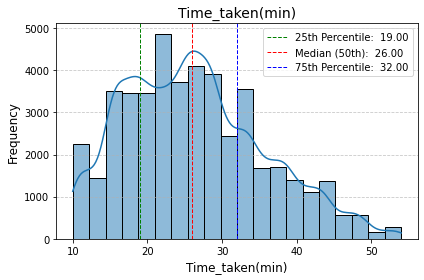

In [94]:
print(df['Time_taken(min)'].describe())
plot_histogram(df, 'Time_taken(min)')

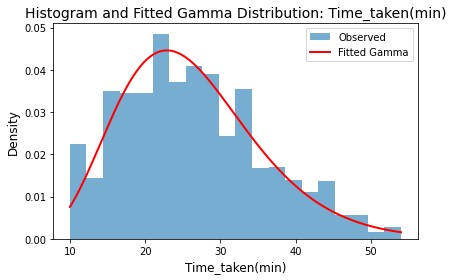

In [95]:
# try fitting Gamma distribution
params = gamma.fit(df['Time_taken(min)'], floc=0)
x = np.linspace(df['Time_taken(min)'].min(), df['Time_taken(min)'].max(), 1000)
pdf_fitted = gamma.pdf(x, *params)  # Calculate the fitted PDF
plt.figure(figsize=(6, 4))
plt.hist(df['Time_taken(min)'], bins=20, density=True, alpha=0.6, label='Observed')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Gamma', linewidth=2)
plt.title(f"Histogram and Fitted Gamma Distribution: Time_taken(min)", fontsize=14)
plt.xlabel('Time_taken(min)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Analysis on features

### Delivery_person_ID

The definition and methodology for collecting delivery person ID is not explained in the dataset, as a result I conduct a validity check on this column:

- There are 1320 unique IDs

- For orders in 2022 (this dataset is consist of delivery information in 2022), there are multiple age and rating for the same ID

- In conclusion, this feature is unreliable for deriving meaningful insights so would be dropped, along with 'ID' column 

In [96]:
print('Number of unique age and rating for the same ID: ')
df.groupby('Delivery_person_ID', as_index=False).agg({'Delivery_person_Age':'nunique', 'Delivery_person_Ratings':'nunique'})

Number of unique age and rating for the same ID: 


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings
0,AGRRES010DEL01,7,7
1,AGRRES010DEL02,10,9
2,AGRRES010DEL03,11,7
3,AGRRES01DEL01,6,6
4,AGRRES01DEL02,11,6
...,...,...,...
1315,VADRES19DEL02,20,11
1316,VADRES19DEL03,17,10
1317,VADRES20DEL01,19,11
1318,VADRES20DEL02,17,13


### Delivery_person_Age

- Delivery_person_Age is a continous variable ranging from (15 to 50), there is no significant outlier present 

- There are 1854 missing values for this feature, use median would be an appropriate choice (the imputation would be done later in model training using median of the train set only)

- From the histogram we can see Delivery_person_Age is widely spread across 20-40

- From the scatter plot we can see a very weak positive correlation between Delivery_person_Age and Time_taken

- This feature alone might not be very useful for prediction especially using GLM, might be worth considering the interaction terms 

- This is relatively a normal-like distribution, so in GLM would only need standardScaler transformation 

Number of null values:  1854


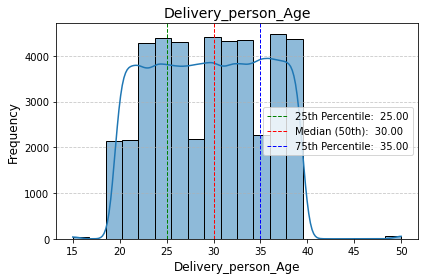

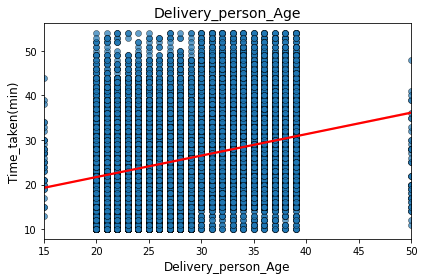

In [97]:
print('Number of null values: ', df['Delivery_person_Age'].isnull().sum())
# Distribution of feature
plot_histogram(df, 'Delivery_person_Age')
# Feature-Target relationship plot
plot_scatter(df, 'Delivery_person_Age','Time_taken(min)')

### Delivery_person_Ratings

- This is a continous numerical feature ranging from 1 to 6 

- There are 1908 missing values, which would require median imputation after train-test split

- From the histogram, we can see the distribution is heavily left-skewed, however, since it is already bounded (max rating is 6) into a small range, other form of transformation is not necessary. StandrdScaler is still required

- From the scatter plot, we can observe a negative relationship bewteen ratings and time taken, which intuitively make sense

Number of null values:  1908


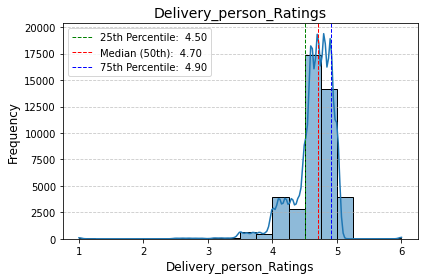

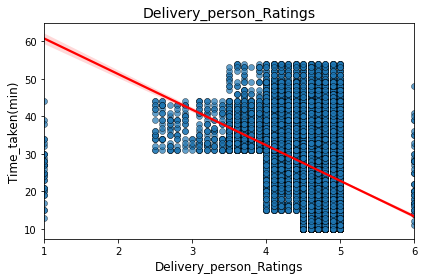

In [98]:
print('Number of null values: ', df['Delivery_person_Ratings'].isnull().sum())
# Distribution of feature
plot_histogram(df, 'Delivery_person_Ratings')
# Feature-Target relationship plot
plot_scatter(df, 'Delivery_person_Ratings','Time_taken(min)')

### Longtitude and Latitude
[Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude]

- We can find outliers from the plot as Restaurant_latitude and Restaurant_longitude have negative values, it is very unlikely to do food delivery from 
Southern Hemisphere to Northern Hemisphere, hence very likely it is a sign error

- Most of restaurants and delivery locations are around (10-30, 75), which would be in Inida. There are a couple of locations near (0,0), could be potential data entry errors 

- Coordinate itself cannot generate useful information, the distance from restaurant and delivery location is a more meaningful feature

- Generate new feature Delivery_Distance

    - Delivery_Distance is a continuous variable ranging from 1.5 to 21km
    
    - There is a moderate positive relationship between delivery distance and time taken, which makes sense intuitively 

    - Since the distribution if right-skewed, in GLM the feature needs to have log-transformation first then StandardScaler 


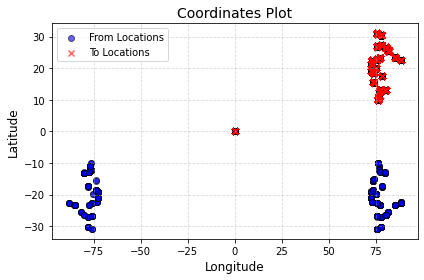

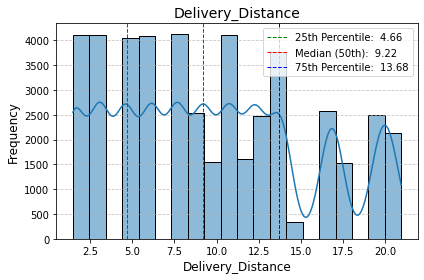

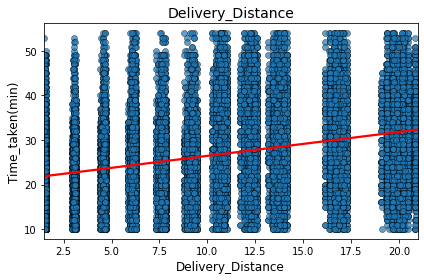

In [99]:
plot_coordinates(df, 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude')

# clean-up 
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()
df['Restaurant_longitude'] = df['Restaurant_longitude'].abs()

# calculate distance 
df['Delivery_Distance'] = df.apply(lambda row: compute_haversine_distance(
        row['Restaurant_latitude'], row['Restaurant_longitude'],
        row['Delivery_location_latitude'], row['Delivery_location_longitude']),axis=1)

# distribution of Delivery_Distance
plot_histogram(df, 'Delivery_Distance')
plot_scatter(df, 'Delivery_Distance', 'Time_taken(min)')

### Order_Date

- Order_Date is in string format 'dd-mm-yyyy', the date itself is not a useful features

- Create a new categorical feature 'Is_Weekday' showing whether the order occurs during weekday (1) or weekend (0)

    - From the distribution, we can see weekday is the dominant class 

    - From the box plot, we can see there is a very slight difference in time taken for delivery between weekday and weekends, in weekday it takes slightly longer to deliver on average

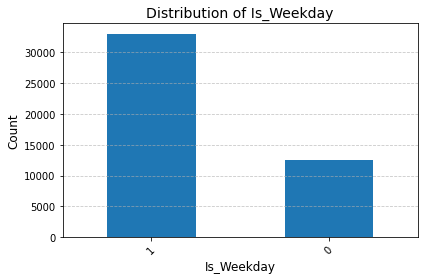

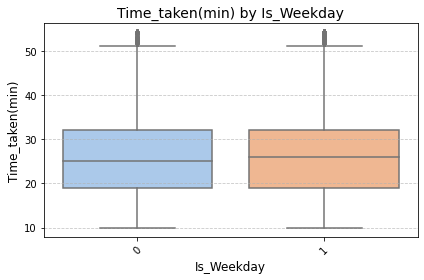

,Is_Weekday,Median,Q1,Q3,Min,Max,Mean
0,0,25.0,19.0,32.0,10.0,54.0,26.249940
1,1,26.0,19.0,32.0,10.0,54.0,26.311551


In [100]:
# convert date in string representation to datetime 
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')
df['Is_Weekday'] = df['Order_Date'].apply(is_weekday)

# Distribution of the feature
plot_categorical_distribution(df, 'Is_Weekday')
plot_boxplot(df, 'Is_Weekday', 'Time_taken(min)')
categorical_summary(df, 'Is_Weekday', 'Time_taken(min)')

### Time_Orderd and Time_Order_picked

- There are 1731 missing values in Time_Orderd while no missing values in Time_Order_picked

- The Time_taken(min) is recording the time taken since Time_Order_picked, the waiting time from Time_Ordered to Time_Order_picked is not included

- Create new feature Pickup_Diff = Time_Order_picked - Time_Orderd (where both are non-null)

    - from the histogram, we are quite surprised to see Pickup_Diff is more like a categorical feature (with only 3 values 5, 10, 15) instead of a continuous variable we expect

    - from the statistical summary, we can see time taken for delivery does not show any variation across these 3 groups, hence not a meaningful feature

- Create new feature Pickup_Day_Bin (categorical: Monrning, Afternoon, Evening, Night) from Time_Order_picked

    - from the hitogram we can see a large majority of the order occur in evening and night

    - from the box plot and statistical summary we can see orders in the evening take longer time for delivery 

    - need to use one-hot encoder in GLM and ordinal encoder in LGBM 

Number of null values:  Time_Orderd          1731
Time_Order_picked       0
dtype: int64


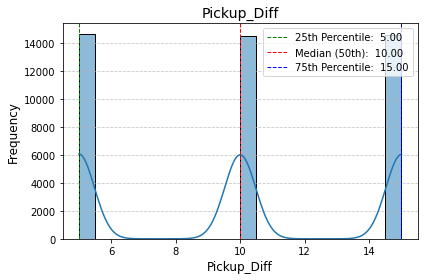

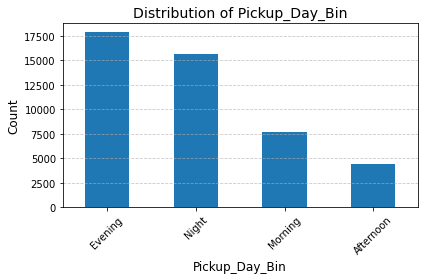

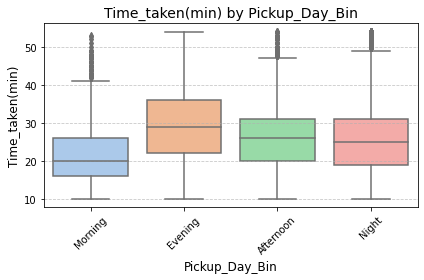

,Pickup_Day_Bin,Median,Q1,Q3,Min,Max,Mean
0,Afternoon,26.0,20.0,31.0,10.0,54.0,25.924541
1,Evening,29.0,22.0,36.0,10.0,54.0,29.061154
2,Morning,20.0,16.0,26.0,10.0,53.0,20.950281
3,Night,25.0,19.0,31.0,10.0,54.0,25.849593


In [101]:
print('Number of null values: ', df[['Time_Orderd','Time_Order_picked' ]].isnull().sum())

#convert from string to timestamp
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

#calculate time difference between pick-up and order
df['Pickup_Diff'] = df.apply(lambda row: calculate_time_difference(row['Time_Order_picked'], row['Time_Orderd']),axis=1)

#distribution of the pickup time diff
plot_histogram(df, 'Pickup_Diff')

#statistical summary of the pickup time diff
categorical_summary(df, 'Pickup_Diff', 'Time_taken(min)')

#determine the time bin of the pickup time
df['Pickup_Day_Bin'] = df['Time_Order_picked'].apply(create_time_bin)

plot_categorical_distribution(df, 'Pickup_Day_Bin')
plot_boxplot(df, 'Pickup_Day_Bin', 'Time_taken(min)')
categorical_summary(df, 'Pickup_Day_Bin','Time_taken(min)' )


### Weatherconditions

- There are 616 missing values need to be imputed (using mode) after the train-test split

- From the histogram we can see the distribution among 6 weather types is quite balanced

- From the box plot and statistical summary we can see delivery time is taking longer and has a larger range under cloudy and foggy weather 

- Similarly would require one-hot encoder for GLM and ordinal encoder for LGBM

Number of null values:  616


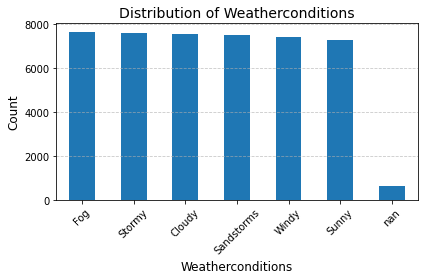

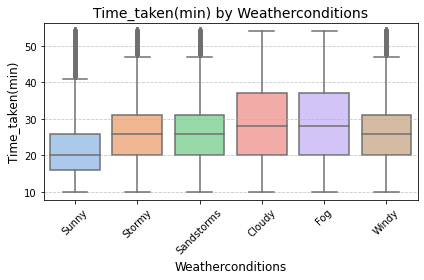

,Weatherconditions,Median,Q1,Q3,Min,Max,Mean
0,Cloudy,28.0,20.0,37.0,10.0,54.0,28.917330
1,Fog,28.0,20.0,37.0,10.0,54.0,28.916122
2,Sandstorms,26.0,20.0,31.0,10.0,54.0,25.875517
3,Stormy,26.0,20.0,31.0,10.0,54.0,25.870815
4,Sunny,20.0,16.0,26.0,10.0,54.0,21.856947
5,Windy,26.0,20.0,31.0,10.0,54.0,26.118836


In [102]:
print('Number of null values: ', df['Weatherconditions'].isnull().sum())

#clean up value
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '', regex=False)

#plot 
plot_categorical_distribution(df, 'Weatherconditions')
plot_boxplot(df, 'Weatherconditions', 'Time_taken(min)')
categorical_summary(df, 'Weatherconditions', 'Time_taken(min)')

### Road_traffic_density

- There are 601 missing values need imputation (use mode) after train-test split

- Form the histogram we can see 'High' density group is slightly underrepresented in the dataset

- The box chart and statitical summary suggests higher traffic density leads to ,onger and more varaible delivery time

- This categorical feature indicates the traffic density level, so should use ordinal encoder in both GLM and LGBM model

Number of null values:  601


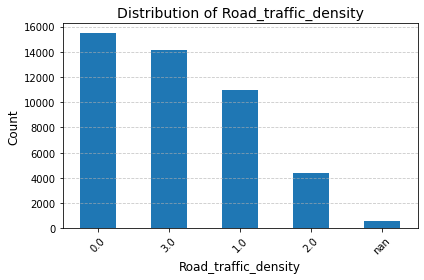

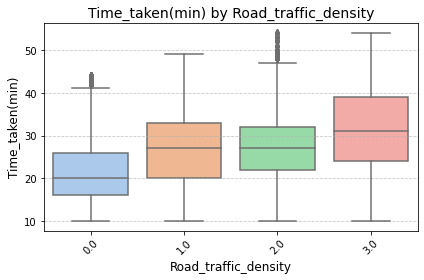

,Road_traffic_density,Median,Q1,Q3,Min,Max,Mean
0,0.0,20.0,16.0,26.0,10.0,44.0,21.266977
1,1.0,27.0,20.0,33.0,10.0,49.0,26.699644
2,2.0,27.0,22.0,32.0,10.0,54.0,27.240000
3,3.0,31.0,24.0,39.0,10.0,54.0,31.176624


In [103]:
#create an ordinal mapping
density_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Jam': 3}
df['Road_traffic_density'] = df['Road_traffic_density'].map(density_mapping)

print('Number of null values: ', df['Road_traffic_density'].isnull().sum())
plot_categorical_distribution(df, 'Road_traffic_density')
plot_boxplot(df, 'Road_traffic_density', 'Time_taken(min)')
categorical_summary(df, 'Road_traffic_density', 'Time_taken(min)')

### Vehicle_condition

- This is already an ordinal categorical feature 

- From the histogram we can see the distribution for 0,1,2 is quite evenm however, 3 is significantly underrepresented 

- Time taken for delivery under vehicle condition 0 is significantly longer, I think very likely 0 represents poor vehicle conditoin so this trend is reasonable intuitively 

- Since it is already ordinal, no transformation needed for both GLM and LGBM

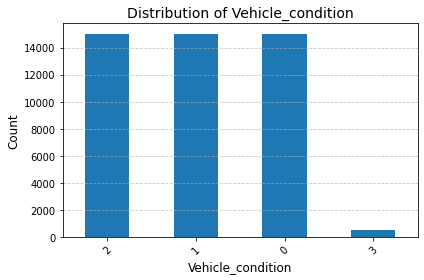

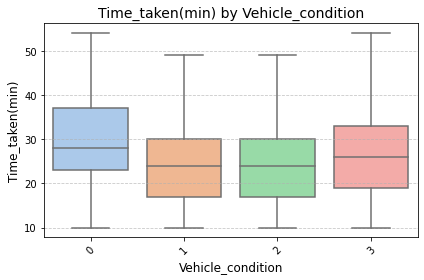

,Vehicle_condition,Median,Q1,Q3,Min,Max,Mean
0,0,28.0,23.0,37.0,10.0,54.0,30.072223
1,1,24.0,17.0,30.0,10.0,49.0,24.355090
2,2,24.0,17.0,30.0,10.0,49.0,24.455434
3,3,26.0,19.0,33.0,10.0,54.0,26.492308


In [104]:
plot_categorical_distribution(df, 'Vehicle_condition')
plot_boxplot(df, 'Vehicle_condition', 'Time_taken(min)')
categorical_summary(df, 'Vehicle_condition', 'Time_taken(min)')

### Type_of_order

- From histogram we can see the distribution for 4 order types is quite balanced

- No noticable trend can be found between time taken for delivery and each group 

- Since this is categorical, need to use one-hot encoder for GLM and label encoder for lGBM 

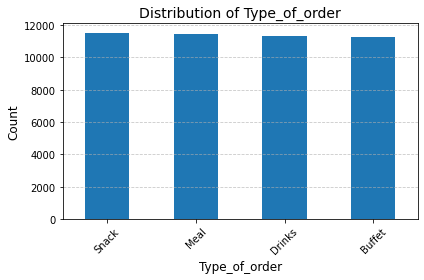

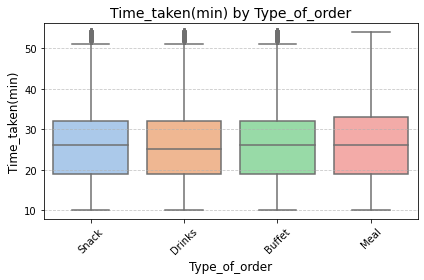

,Type_of_order,Median,Q1,Q3,Min,Max,Mean
0,Buffet,26.0,19.0,32.0,10.0,54.0,26.283511
1,Drinks,25.0,19.0,32.0,10.0,54.0,26.187953
2,Meal,26.0,19.0,33.0,10.0,54.0,26.419270
3,Snack,26.0,19.0,32.0,10.0,54.0,26.286309


In [105]:
plot_categorical_distribution(df, 'Type_of_order')
plot_boxplot(df, 'Type_of_order', 'Time_taken(min)')
categorical_summary(df, 'Type_of_order', 'Time_taken(min)')

### Type_of_vehicle

- From the histogram we can see majority of the deliveries are made by motorcycles and scooter, bicycle is very rare

- Need to use one-hot encoder for GLM and label encoder for LGBM

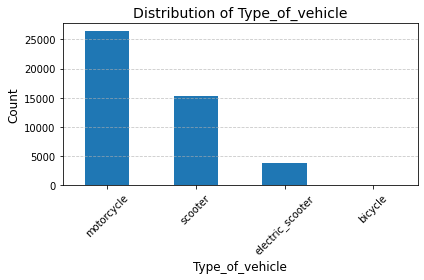

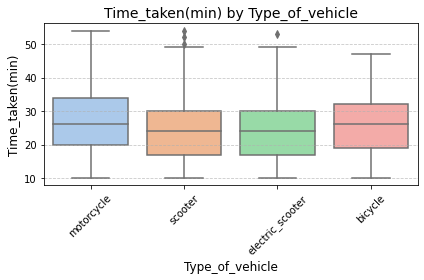

,Type_of_vehicle,Median,Q1,Q3,Min,Max,Mean
0,bicycle,26.0,19.0,32.25,10.0,47.0,26.426471
1,electric_scooter,24.0,17.0,30.00,10.0,53.0,24.470110
2,motorcycle,26.0,20.0,34.00,10.0,54.0,27.605674
3,scooter,24.0,17.0,30.00,10.0,54.0,24.480754


In [106]:
plot_categorical_distribution(df, 'Type_of_vehicle')
plot_boxplot(df, 'Type_of_vehicle', 'Time_taken(min)')
categorical_summary(df, 'Type_of_vehicle', 'Time_taken(min)')

### multiple_deliveries

- This feature has 993 empty values which would require imputation (mode)

- From the box plot and statistical summary, we can see a strong relationship between delivery time and number of multiple deliveries 

- Since this is already ordinal, it can be used directly by GLM and LGBM without transformation

Number of null values:  993


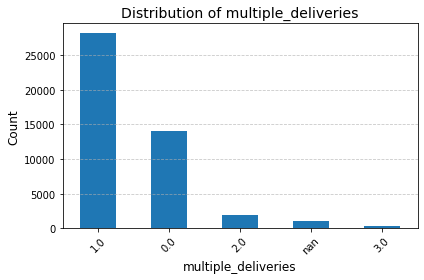

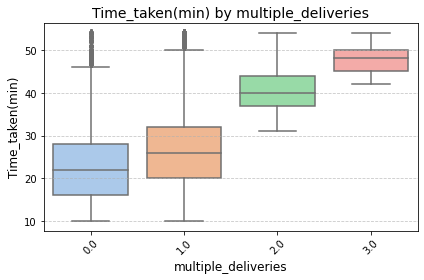

,multiple_deliveries,Median,Q1,Q3,Min,Max,Mean
0,0.0,22.0,16.0,28.0,10.0,54.0,22.876268
1,1.0,26.0,20.0,32.0,10.0,54.0,26.855890
2,2.0,40.0,37.0,44.0,31.0,54.0,40.454912
3,3.0,48.0,45.0,50.0,42.0,54.0,47.819945


In [107]:
print('Number of null values: ', df['multiple_deliveries'].isnull().sum())
plot_categorical_distribution(df, 'multiple_deliveries')
plot_boxplot(df, 'multiple_deliveries', 'Time_taken(min)')
categorical_summary(df, 'multiple_deliveries', 'Time_taken(min)')

### Festival

- There are 228 missing values that need mode imputation 

- From the histogram we can see predominantly deliveries occur during non-festival days in this dataset

- From the box plot and statistical summary we can find deliveries during festival days are consitently longer and less variable 

- 


Number of null values:  228


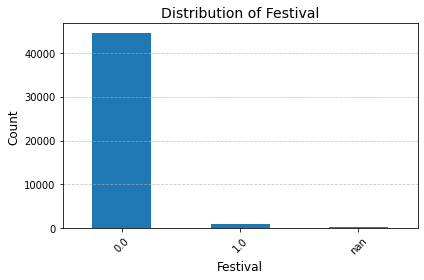

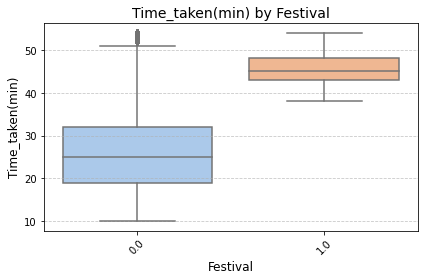

,Festival,Median,Q1,Q3,Min,Max,Mean
0,0.0,25.0,19.0,32.0,10.0,54.0,25.984843
1,1.0,45.0,43.0,48.0,38.0,54.0,45.517857


In [108]:
print('Number of null values: ', df['Festival'].isnull().sum())
#convert to binary
df['Festival'] = df['Festival'].map({'Yes': int(1), 'No': int(0)})
plot_categorical_distribution(df, 'Festival')
plot_boxplot(df, 'Festival', 'Time_taken(min)')
categorical_summary(df, 'Festival', 'Time_taken(min)')

### City

- There are 1200 missing values for imputation (using mode) after train-test split 

- The dominant class is Metopolitan, semi-urban is very rare in the dataset

- One-hot encoder for GLM and label encoder for LGBM


Number of null values:  1200


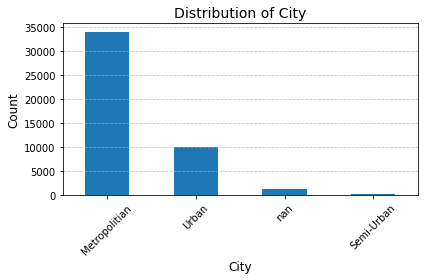

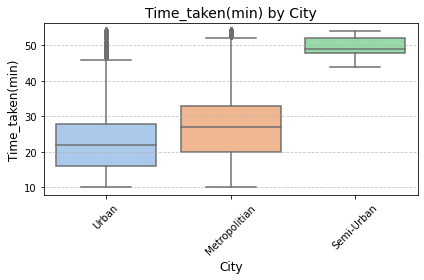

,City,Median,Q1,Q3,Min,Max,Mean
0,Metropolitian,27.0,20.0,33.0,10.0,54.0,27.315226
1,Semi-Urban,49.0,48.0,52.0,44.0,54.0,49.731707
2,Urban,22.0,16.0,28.0,10.0,54.0,22.984017


In [109]:
print('Number of null values: ', df['City'].isnull().sum())
plot_categorical_distribution(df, 'City')
plot_boxplot(df, 'City', 'Time_taken(min)')
categorical_summary(df, 'City', 'Time_taken(min)')

# Correlation plot

- The correlation between each feature and target variable is shown in the heatmap

- Features that are not fit-for-purpose for the modelling will be dropped (see reasoning in the Feature Analysis part above)

- We can see strong correlation and weak correlation for selected features, although some features are showing very low correlation, we will still carry them over to the modelling as:

    - in GLM we will use regularization to penalize less useful features automatically 

    - in LGBM, since it is a tree-based model, low correlation features can still contribute if the interact non-linearly with other features

In [110]:
#drop columns not in use
df = df.drop(['ID', 'Delivery_person_ID','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Pickup_Diff'], axis=1)

In [111]:
report_column_stats(df)

,Column,Data Type,UniqueCount,MissingCount,MissingPct,Mode,Minimum,Maximum,Mean,Median,Std
0,Delivery_person_Age,float64,22,1854,4.066414,35.0,15.000000,50.000000,29.567137,30.000000,5.815155
1,Delivery_person_Ratings,float64,28,1908,4.184853,4.8,1.000000,6.000000,4.633780,4.700000,0.334716
2,Weatherconditions,object,6,616,1.351085,Fog,NaN,NaN,NaN,NaN,NaN
3,Road_traffic_density,float64,4,601,1.318185,0.0,0.000000,3.000000,1.383046,1.000000,1.246208
4,Vehicle_condition,int64,4,0,0.000000,2,0.000000,3.000000,1.023359,1.000000,0.839065
5,Type_of_order,object,4,0,0.000000,Snack,NaN,NaN,NaN,NaN,NaN
6,Type_of_vehicle,object,4,0,0.000000,motorcycle,NaN,NaN,NaN,NaN,NaN
7,multiple_deliveries,float64,4,993,2.177966,1.0,0.000000,3.000000,0.744664,1.000000,0.572473
8,Festival,float64,2,228,0.500077,0.0,0.000000,1.000000,0.019751,0.000000,0.139145
9,City,object,3,1200,2.631983,Metropolitian,NaN,NaN,NaN,NaN,NaN


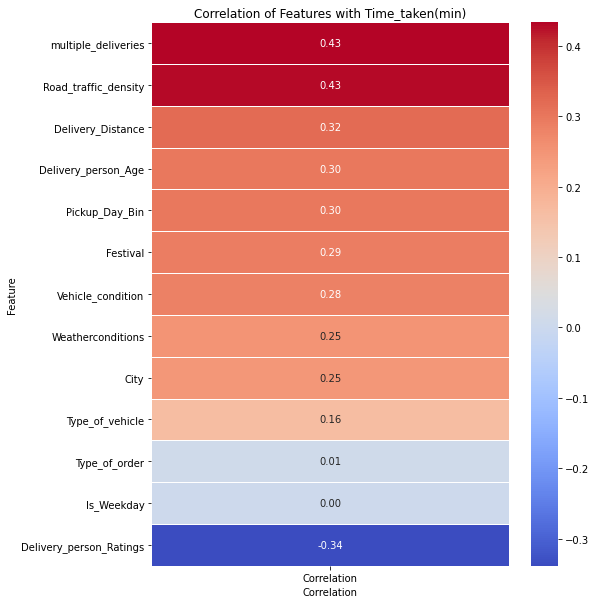

In [112]:
# correlation 
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Delivery_Distance']
categorical_features = [
    'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 
    'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 
    'Festival', 'City', 'Is_Weekday', 'Pickup_Day_Bin'
]
plot_heatmap(df, 'Time_taken(min)', numerical_features, categorical_features)


## Feature Selection Summary:

### Target:

- Time_taken(min)

    - Continuous, seems to follow Gamma distribution 

### Features:

- Continuous

    - Delivery_person_Age

        - impute missing with median

        - standardScaler in GLM

    - Delivery_person_Ratings

        - impute missing with median

        - standardScaler in GLM

    - Delivery_Distance

        - log-transformation then standardScaler in GLM


- Categorical

    - Weatherconditions

        - impute missing with mode

        - one-hot encoder in GLM

        - 

    - Road_traffic_density

        - impute missing with mode

        - ordinal encoder in both GLM and LGBM

    - Vehicle_condition

        - already ordinal, no transformation needed in both GLM and lGBM

    - Type_of_order

        - 

    - Type_of_vehicle

    - multiple_deliveries

    - Festival

    - City

    - Is_Weekday

    - Pickup_Day_Bin




# Export as parquet

In [113]:
# Save as Parquet
# df.to_parquet('data/prepared/prepared_data.parquet', engine='pyarrow', index=False)
